In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
data = pd.read_csv("data/project1.csv")
print("Shape: ", data.shape)
print("Size: ", data.size)
print("Dtypes: ")
data.info()

Shape:  (386, 10)
Size:  3860
Dtypes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        386 non-null    object
 1   age          386 non-null    object
 2   menopause    386 non-null    object
 3   tumor-size   385 non-null    object
 4   inv-nodes    385 non-null    object
 5   node-caps    386 non-null    object
 6   deg-malig    386 non-null    int64 
 7   breast       386 non-null    object
 8   breast-quad  386 non-null    object
 9   irradiat     386 non-null    object
dtypes: int64(1), object(9)
memory usage: 30.3+ KB


In [3]:
data.isnull().sum()

class          0
age            0
menopause      0
tumor-size     1
inv-nodes      1
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [4]:
data['tumor-size'] = data.groupby(['age'])['tumor-size'].transform(lambda x: x.fillna(x.mode()[0]))

In [5]:
data['inv-nodes'] = data.groupby(['age'])['inv-nodes'].transform(lambda x: x.fillna(x.mode()[0]))

In [6]:
print("class", data['class'].unique())
print("age", data['age'].unique())
print("menopause", data['menopause'].unique())
print("tumor-size ", data['tumor-size'].unique())
print("inv nodes", data['inv-nodes'].unique())
print("node caps", data['node-caps'].unique())
print("deg malig", data['deg-malig'].unique())
print("breast", data['breast'].unique())
print("breast quad", data['breast-quad'].unique())
print("irradiat", data['irradiat'].unique())
data.info()

class ['recurrence-events' 'no-recurrence-events']
age ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
menopause ['premeno' 'ge40' 'lt40']
tumor-size  ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
inv nodes ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
node caps ['no' '*' 'yes' '?']
deg malig [3 2 1]
breast ['left' 'right']
breast quad ['left_low' 'right_up' 'left_up' 'right_low' '?' 'central' '*']
irradiat ['no' 'yes']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        386 non-null    object
 1   age          386 non-null    object
 2   menopause    386 non-null    object
 3   tumor-size   386 non-null    object
 4   inv-nodes    386 non-null    object
 5   node-caps    386 non-null    object
 6   deg-malig    386 non-null    int64 
 7   breast       386 non-null    object
 8   breast-q

In [7]:
data['class'] = data['class'].astype("category")

In [8]:
data['age'] = data['age'].astype("category")

In [9]:
data['menopause'] = data['menopause'].astype("category")

In [10]:
data['tumor-size'] = data['tumor-size'].astype("category")

In [11]:
data['inv-nodes'] = data['inv-nodes'].astype("category")

In [12]:
data['node-caps'] = data['node-caps'].astype("category")

In [13]:
data['breast'] = data['breast'].astype("category")

In [14]:
data['breast-quad'] = data['breast-quad'].astype("category")

In [15]:
data['irradiat'] = data['irradiat'].astype("category")

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   class        386 non-null    category
 1   age          386 non-null    category
 2   menopause    386 non-null    category
 3   tumor-size   386 non-null    category
 4   inv-nodes    386 non-null    category
 5   node-caps    386 non-null    category
 6   deg-malig    386 non-null    int64   
 7   breast       386 non-null    category
 8   breast-quad  386 non-null    category
 9   irradiat     386 non-null    category
dtypes: category(9), int64(1)
memory usage: 8.5 KB


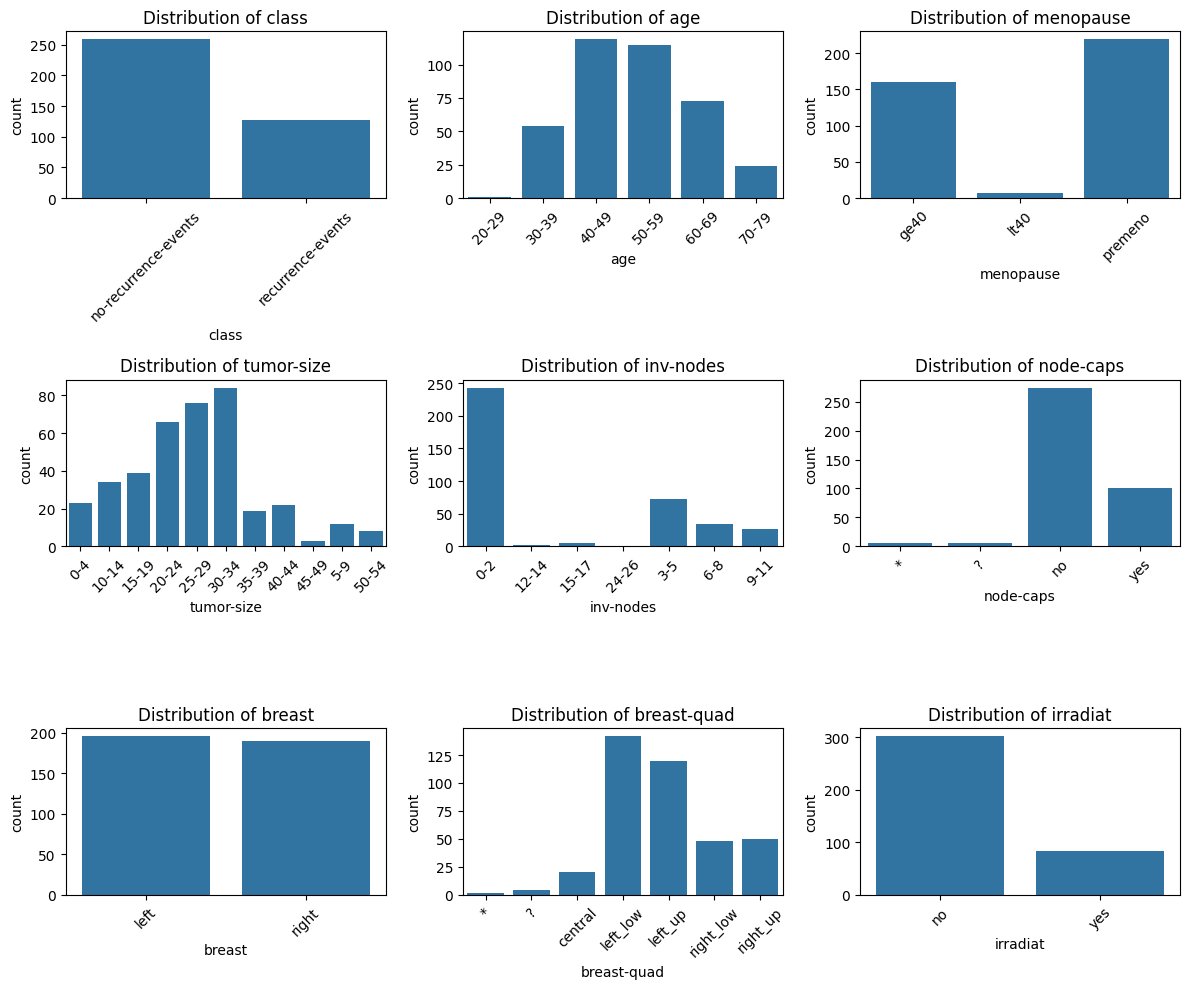

In [17]:
categorical_cols = ['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat']
plt.figure(figsize=(12,10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(x=data[col])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   deg-malig                386 non-null    int64
 1   class_recurrence-events  386 non-null    bool 
 2   age_30-39                386 non-null    bool 
 3   age_40-49                386 non-null    bool 
 4   age_50-59                386 non-null    bool 
 5   age_60-69                386 non-null    bool 
 6   age_70-79                386 non-null    bool 
 7   menopause_lt40           386 non-null    bool 
 8   menopause_premeno        386 non-null    bool 
 9   tumor-size_10-14         386 non-null    bool 
 10  tumor-size_15-19         386 non-null    bool 
 11  tumor-size_20-24         386 non-null    bool 
 12  tumor-size_25-29         386 non-null    bool 
 13  tumor-size_30-34         386 non-null    bool 
 14  tumor-size_35-39         386 non-null    bool 
 15  tumor-

In [20]:
data.duplicated().sum()

11

In [21]:
data.drop_duplicates(inplace=True, ignore_index=True)

In [22]:
data.duplicated().sum()

0

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score

In [24]:
X = data.drop(columns=['class_recurrence-events'])
y = data['class_recurrence-events'].astype(int)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2)

In [26]:
clf = SGDClassifier(loss="perceptron", alpha=0.01)
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.01, loss='perceptron')

In [27]:
accuracy_test = accuracy_score(y_test, clf.predict(X_test))
accuracy_train = accuracy_score(y_train, clf.predict(X_train))
class_report_test = classification_report(y_test, clf.predict(X_test))
class_report_train = classification_report(y_train, clf.predict(X_train))
# print(f"Train accuracy: {accuracy_train}; Test accuracy: {accuracy_test}")
print("Classification Report SGD Perceptron on TEST:")
print(f"{class_report_test}")
print("Classification Report SGD Perceptron on TRAIN:")
print(f"{class_report_train}")
#F1 score averages precision and recall
# Recall = TP / TP + FN, gets worse as false negatives increases
# Precision = TP / TP + FP, gets worse as false positives increases

Classification Report SGD Perceptron on TEST:
              precision    recall  f1-score   support

           0       0.76      0.65      0.70        77
           1       0.43      0.56      0.48        36

    accuracy                           0.62       113
   macro avg       0.59      0.60      0.59       113
weighted avg       0.65      0.62      0.63       113

Classification Report SGD Perceptron on TRAIN:
              precision    recall  f1-score   support

           0       0.81      0.66      0.73       177
           1       0.49      0.67      0.56        85

    accuracy                           0.66       262
   macro avg       0.65      0.67      0.65       262
weighted avg       0.70      0.66      0.67       262



K Nearest Neighbor

In [28]:
X_train.shape

(262, 35)

In [29]:
X_test.shape

(113, 35)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
class_report_test = classification_report(y_test, knn.predict(X_test))
class_report_train = classification_report(y_train, knn.predict(X_train))
# print(f"Train accuracy: {accuracy_train}; Test accuracy: {accuracy_test}")
print("Classification Report KNN on TEST:")
print(f"{class_report_test}")
print("Classification Report KNN on TRAIN:")
print(f"{class_report_train}")

Classification Report KNN on TEST:
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        77
           1       0.29      0.22      0.25        36

    accuracy                           0.58       113
   macro avg       0.48      0.48      0.48       113
weighted avg       0.55      0.58      0.56       113

Classification Report KNN on TRAIN:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       177
           1       0.71      0.58      0.64        85

    accuracy                           0.79       262
   macro avg       0.76      0.73      0.74       262
weighted avg       0.78      0.79      0.78       262



In [33]:
knn_search_accuracy = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1,100)}

In [34]:
from sklearn.model_selection import GridSearchCV
knn_gscv = GridSearchCV(knn_search_accuracy, param_grid, cv=5)

In [35]:
knn_gscv.fit(X_train, y_train)
knn_gscv.best_params_

{'n_neighbors': 30}

In [36]:
best_knn = knn_gscv.best_estimator_
class_report_test = classification_report(y_test, best_knn.predict(X_test))
class_report_train = classification_report(y_train, best_knn.predict(X_train))
# print(f"Train accuracy: {accuracy_train}; Test accuracy: {accuracy_test}")
print("Classification Report KNN_GSCV on TEST:")
print(f"{class_report_test}")
print("Classification Report KNN_GSCV on TRAIN:")
print(f"{class_report_train}")

Classification Report KNN_GSCV on TEST:
              precision    recall  f1-score   support

           0       0.68      0.97      0.80        77
           1       0.33      0.03      0.05        36

    accuracy                           0.67       113
   macro avg       0.51      0.50      0.43       113
weighted avg       0.57      0.67      0.56       113

Classification Report KNN_GSCV on TRAIN:
              precision    recall  f1-score   support

           0       0.69      0.98      0.81       177
           1       0.67      0.07      0.13        85

    accuracy                           0.69       262
   macro avg       0.68      0.53      0.47       262
weighted avg       0.68      0.69      0.59       262



In [37]:
knn_search_recall = KNeighborsClassifier()
knn_gscv2 = GridSearchCV(knn_search_recall, param_grid, cv=5, scoring="recall")
knn_gscv2.fit(X_train, y_train)
knn_gscv2.best_params_

{'n_neighbors': 1}

In [38]:
best_recall = knn_gscv2.best_estimator_

In [39]:
# the list of models we want to test
models = [knn, best_knn, best_recall]
for m in models:
    # Recall
    # on test data
    recall_test=recall_score(y_test, m.predict(X_test))
    print(f'Recall of {m} on test data is : {recall_test}')
    # on training data
    recall_train=recall_score(y_train, m.predict(X_train))
    print(f'Recall of {m} on train data is : {recall_train}')

Recall of KNeighborsClassifier(n_neighbors=3) on test data is : 0.2222222222222222
Recall of KNeighborsClassifier(n_neighbors=3) on train data is : 0.5764705882352941
Recall of KNeighborsClassifier(n_neighbors=30) on test data is : 0.027777777777777776
Recall of KNeighborsClassifier(n_neighbors=30) on train data is : 0.07058823529411765
Recall of KNeighborsClassifier(n_neighbors=1) on test data is : 0.25
Recall of KNeighborsClassifier(n_neighbors=1) on train data is : 0.9764705882352941


In [40]:
class_report_test = classification_report(y_test, best_recall.predict(X_test))
class_report_train = classification_report(y_train, best_recall.predict(X_train))
# print(f"Train accuracy: {accuracy_train}; Test accuracy: {accuracy_test}")
print("Classification Report KNN_GSCV_RECALL on TEST:")
print(f"{class_report_test}")
print("Classification Report KNN_GSCV_RECALL on TRAIN:")
print(f"{class_report_train}")

Classification Report KNN_GSCV_RECALL on TEST:
              precision    recall  f1-score   support

           0       0.64      0.61      0.62        77
           1       0.23      0.25      0.24        36

    accuracy                           0.50       113
   macro avg       0.43      0.43      0.43       113
weighted avg       0.51      0.50      0.50       113

Classification Report KNN_GSCV_RECALL on TRAIN:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       177
           1       0.99      0.98      0.98        85

    accuracy                           0.99       262
   macro avg       0.99      0.99      0.99       262
weighted avg       0.99      0.99      0.99       262

